In [23]:
import pandas as pd
pca_result = pd.read_csv('pca_result.csv', index_col=0)  # index_col=0, it will use row index 


print(pca_result)


            PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
mac   -0.546165 -0.686420  0.022557  0.098879 -0.079596 -0.226769  0.190499   
mac   -0.002608  1.863137 -1.594777  0.572421 -1.058473 -0.906292 -0.390449   
mac    0.419681  1.826649  1.283294 -1.359439  0.079990 -0.418818 -2.038534   
mac   -0.184193 -0.282636  0.316733 -0.783184 -0.004147  0.091151  0.408551   
mac   -0.372004  5.021824 -6.239199  0.310780 -2.401987 -0.275739  1.852935   
...         ...       ...       ...       ...       ...       ...       ...   
lamp5  0.640310 -0.122603 -0.244025  0.694581  1.323912  1.260098  0.743295   
lamp5  0.218266 -0.195939 -0.522069 -0.554914 -0.749573 -0.786149  0.817871   
lamp5 -0.250799 -0.522234  0.628705 -1.318766 -0.760392 -0.223497 -1.325465   
lamp5  0.005941 -0.864916 -0.121287 -0.827365 -0.477287 -0.551067  0.591068   
lamp5  0.122411  1.386172 -1.958988 -0.779524 -1.802762  0.194131  0.936804   

            PC8       PC9      PC10  ...      PC29 

In [24]:

#eliminate PC1 and PC2 for prepearing randomforest
pca_result_modified = pca_result.drop(columns=['PC1', 'PC2'])

pca_result_modified = pca_result_modified.iloc[:, :10]


print(pca_result_modified)

            PC3       PC4       PC5       PC6       PC7       PC8       PC9  \
mac    0.022557  0.098879 -0.079596 -0.226769  0.190499  0.260548 -0.365502   
mac   -1.594777  0.572421 -1.058473 -0.906292 -0.390449  0.244872  0.575892   
mac    1.283294 -1.359439  0.079990 -0.418818 -2.038534 -0.584627 -1.539546   
mac    0.316733 -0.783184 -0.004147  0.091151  0.408551  0.014241 -0.047270   
mac   -6.239199  0.310780 -2.401987 -0.275739  1.852935 -0.509178  1.100869   
...         ...       ...       ...       ...       ...       ...       ...   
lamp5 -0.244025  0.694581  1.323912  1.260098  0.743295  0.397112  0.332693   
lamp5 -0.522069 -0.554914 -0.749573 -0.786149  0.817871 -0.281562  0.467556   
lamp5  0.628705 -1.318766 -0.760392 -0.223497 -1.325465 -0.151266  0.130333   
lamp5 -0.121287 -0.827365 -0.477287 -0.551067  0.591068 -0.397557  0.380092   
lamp5 -1.958988 -0.779524 -1.802762  0.194131  0.936804  0.871240 -0.233621   

           PC10      PC11      PC12  
mac   -0.0882

In [25]:
# Create a new column
pca_result_modified['y'] = ''

# While creating the 'y' column, set the value as 'positive' for rows with 'macrophage' and 'negative' for rows with 'lamp5'
pca_result_modified.loc[pca_result_modified.index == 'mac', 'y'] = 'positive'
pca_result_modified.loc[pca_result_modified.index == 'lamp5', 'y'] = 'negative'


print(pca_result_modified)


            PC3       PC4       PC5       PC6       PC7       PC8       PC9  \
mac    0.022557  0.098879 -0.079596 -0.226769  0.190499  0.260548 -0.365502   
mac   -1.594777  0.572421 -1.058473 -0.906292 -0.390449  0.244872  0.575892   
mac    1.283294 -1.359439  0.079990 -0.418818 -2.038534 -0.584627 -1.539546   
mac    0.316733 -0.783184 -0.004147  0.091151  0.408551  0.014241 -0.047270   
mac   -6.239199  0.310780 -2.401987 -0.275739  1.852935 -0.509178  1.100869   
...         ...       ...       ...       ...       ...       ...       ...   
lamp5 -0.244025  0.694581  1.323912  1.260098  0.743295  0.397112  0.332693   
lamp5 -0.522069 -0.554914 -0.749573 -0.786149  0.817871 -0.281562  0.467556   
lamp5  0.628705 -1.318766 -0.760392 -0.223497 -1.325465 -0.151266  0.130333   
lamp5 -0.121287 -0.827365 -0.477287 -0.551067  0.591068 -0.397557  0.380092   
lamp5 -1.958988 -0.779524 -1.802762  0.194131  0.936804  0.871240 -0.233621   

           PC10      PC11      PC12         y  
mac

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import joblib

# Separate features and target variable
X = pca_result_modified.iloc[:, :-1]
y = pca_result_modified.iloc[:, -1]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

# Create and train the RandomForestClassifier model
rf_model = RandomForestClassifier(bootstrap=False)
rf_model.fit(X_train, y_train)

# Evaluate the performance of the model (optional)
train_score = rf_model.score(X_train, y_train)
test_score = rf_model.score(X_test, y_test)


print("Test Score:", test_score)
joblib.dump(rf_model, 'random_forest_model.pkl')


Test Score: 0.8732432432432432


['random_forest_model.pkl']

In [ ]:
rf_model.score(X_test,y_test)


0.8687837837837837

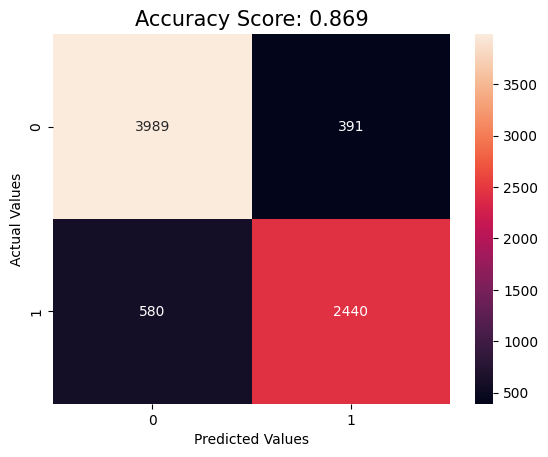

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on test data
predictions = rf_model.predict(X_test)

# Calculate accuracy score
score = round(accuracy_score(y_test, predictions), 3)

# Create confusion matrix
cm1 = confusion_matrix(y_test, predictions)

# Visualize confusion matrix with heatmap
sns.heatmap(cm1, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score), size=15)
plt.show()



In [ ]:
#  Predicting %votes on the test set
votes = rf_model.predict_proba(X_test)

# Creating a DataFrame containing %votes for each cell name
votes_df = pd.DataFrame(data=votes, columns=rf_model.classes_, index=X_test.index)

print(votes_df)

       negative  positive
lamp5      0.80      0.20
mac        0.05      0.95
lamp5      0.95      0.05
lamp5      0.36      0.64
lamp5      0.98      0.02
...         ...       ...
lamp5      0.56      0.44
lamp5      0.76      0.24
lamp5      0.61      0.39
lamp5      0.50      0.50
lamp5      0.98      0.02

[7400 rows x 2 columns]
